<a href="https://colab.research.google.com/github/ash260498/-Datascience/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Aswathi Rajesh


# **Project Summary -**

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn. We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences. The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.The objective of this project is to analyze and cluster TV shows and movies available on Netflix using Python. The goal is to group similar content together based on various features and attributes, allowing for better understanding of Netflix's content library and potential recommendations for users.

# **GitHub Link -**

https://github.com/ash260498/-Datascience/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb

# **Problem Statement**


**Netflix has a vast library of movies and TV shows, and it can be challenging for users to navigate and discover content that aligns with their preferences. The aim of this project is to develop a clustering solution that can group similar movies and TV shows together based on various attributes such as genre, release year, duration, cast members, directors, and more. By clustering the content, we can provide users with a more organized and personalized viewing experience.The goal of this project is to develop an efficient clustering solution that organizes Netflix's content library, provides insights into the content, and offers personalized recommendations to users. This will improve the user experience by facilitating content discovery and enhancing the relevance of recommendations based on individual preferences.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#import libraries
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [131]:
# Load Dataset
#Importing data by reading csv file
file_path = '/content/drive/MyDrive/AlmaBetter/UnsupervisedML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(file_path)


### Dataset First View

In [134]:
# Dataset First Look
original_df = pd.read_csv(file_path,index_col='show_id')
df = original_df.copy()
# top 5 rows
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [135]:
# Dataset Rows & Columns count
# dataframe shape
num_rows = df.shape[0]
num_columns=df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows: 7787
Number of columns:11


### Dataset Information

In [136]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [137]:
df.nunique()


type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

#### Duplicate Values

In [138]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    7787
dtype: int64

#### Missing Values/Null Values

In [139]:
# Missing Values/Null Values Count
null_value_counts = df.isnull().sum()
print(null_value_counts)

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: ylabel='show_id'>

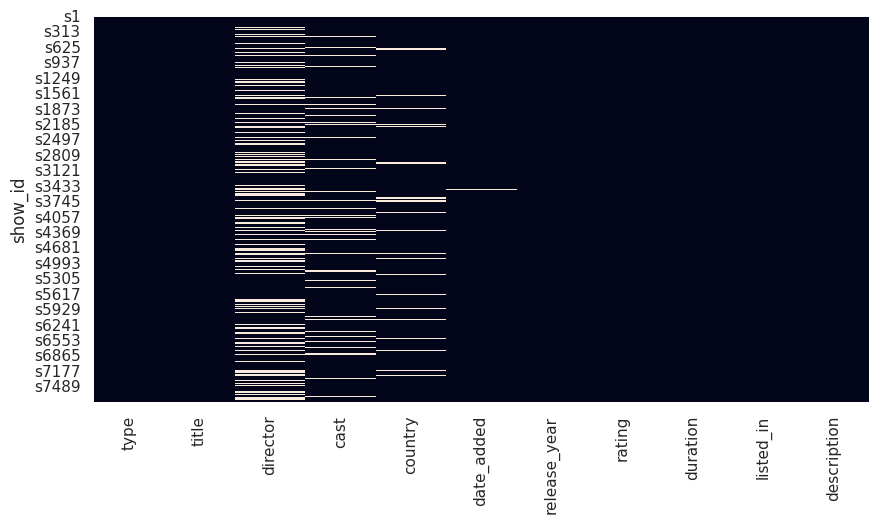

In [141]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.There are about 7787 row and 11 coulmns in the dataset.The various fields are show_id , type,title, director,cast, country , date_added,release_year,rating, duration,listed_in, description.Main libraries used are pandas for data manipulation and aggregation.Matplotlib and seaborn for visualization and behaviour with respect to target variable.And Numpy for computationaly efficient operations.

## ***2. Understanding Your Variables***

In [142]:
# Dataset Columns
# Check Unique Values for each variable.
for column in df.columns:
  #Get unique values for the current columns
  unique_values=df[column].unique()
  print(f"Unique values for column'{column}:")
  print(unique_values)

Unique values for column'type:
['TV Show' 'Movie']
Unique values for column'title:
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values for column'director:
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values for column'cast:
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
Unique values for column'country:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'E

In [143]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

These variables provide details about the content, genre, cast, crew, release year, duration, and other relevant characteristics of the media.It includes both categorical and numerical features. Categorical variables describe qualitative attributes, such as genre (e.g., action, comedy, drama) or target audience (e.g., kids, adults). Numerical variables, on the other hand, provide quantitative information, such as the release year, duration in minutes, or average user ratings.This clustering can help in various applications, such as content recommendation, user segmentation, or content analysis for business purposes.

### Check Unique Values for each variable.

In [144]:
# Check Unique Values for each variable.
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [145]:
# Write your code to make your dataset analysis ready.
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [146]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    387
2017    268
Name: release_year, dtype: int64

In [147]:
#Finding unique values present in the release year
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [148]:
#checking the datatype present in the release year
type(df['release_year'][0])

numpy.int64

In [149]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1121,1012,996,882,868,541,334,267,219,173,...,2,2,2,2,2,1,1,1,1,1


<Axes: >

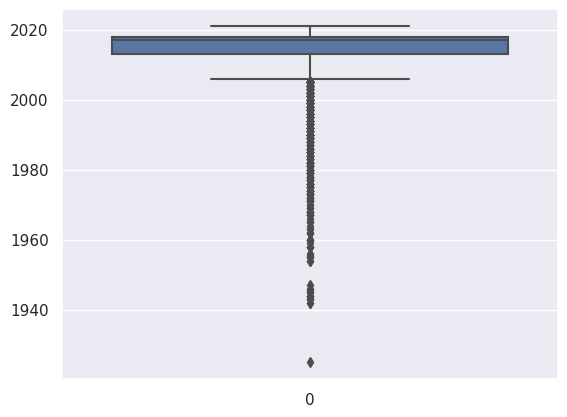

In [150]:
#checking outliers of release column
sns.boxplot(df.release_year)

In [151]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [152]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [153]:
release_year_outliers

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
s95,Movie,28 Days,Betty Thomas,"Sandra Bullock, Viggo Mortensen, Dominic West,...",United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...,...
s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
s7750,TV Show,Yu-Gi-Oh!,NaN,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...


In [154]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

In [155]:
df.release_year.describe()

count    7787.000000
mean     2016.257594
std         2.727605
min      2009.000000
25%      2013.932580
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [156]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


In [157]:
df.title.nunique()

7787

In [158]:
#checking number of unique values present in the country
df.country.nunique()

681

In [159]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2555,923,397,226,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [160]:
#checking number of nan values
df.country.isna().sum()

507

In [161]:
#mode value of country column
df.country.mode()[0]

'United States'

In [162]:
df.country[df.country.isna()] = df.country.mode()[0]

In [163]:
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [164]:
df.country.isna().sum()

0

In [165]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [166]:
production_country[:5]

[('Malaysia', 26, 8, 18),
 ('', 4, 0, 4),
 ('Belarus', 1, 1, 0),
 ('Guatemala', 2, 0, 2),
 ('Czech Republic', 20, 6, 14)]

In [167]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies'])
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [168]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3804,1143,2661
1,India,990,75,915
2,United Kingdom,723,256,467
3,Canada,412,126,286
4,France,349,84,265


In [169]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3804,990,723,412,349
TV-Shows,1143,75,256,126,84
Movies,2661,915,467,286,265


In [170]:
#checking nan values for duration
df.duration.isna().sum()

0

In [171]:
#checking the datatype
df.duration.isna().sum()

0

In [172]:
df.duration.nunique()

216

In [173]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,9 min,182 min,224 min,233 min,196 min,191 min
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [174]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [181]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

"4 Seasons" :
4 Seasons = (45) or 20 episodes
Each episode avg. time is 55 mins.
Total time (in minutes. ) = (5520) min
= 1100 mins

In [182]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [180]:
df.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,9,182,224,233,196,191
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [184]:
df.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,9,182,224,233,196,191
duration,1608,382,184,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [186]:
#Unique values present in the listed in
df.listed_in.nunique()

492

In [187]:
#checking nan values in the listed in
df.listed_in.isna().sum()

0

In [188]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Anime Series, Crime TV Shows, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,205,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [190]:
#making categories
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [191]:
len(categories)

17071

In [192]:
len(set(categories))

42

In [193]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [194]:
category_wise_count

{'Science & Nature TV': 85,
 'Movies': 56,
 'Spanish-Language TV Shows': 147,
 'Korean TV Shows': 150,
 'Faith & Spirituality': 57,
 'Classic & Cult TV': 27,
 'British TV Shows': 232,
 'TV Mysteries': 90,
 'LGBTQ Movies': 90,
 "Kids' TV": 414,
 'Stand-Up Comedy': 329,
 'Romantic Movies': 531,
 'Classic Movies': 103,
 'Independent Movies': 673,
 'Documentaries': 786,
 'Music & Musicals': 321,
 'TV Comedies': 525,
 'Comedies': 1471,
 'Sci-Fi & Fantasy': 218,
 'Sports Movies': 196,
 'Action & Adventure': 721,
 'TV Sci-Fi & Fantasy': 76,
 'TV Dramas': 704,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Thrillers': 50,
 'Docuseries': 353,
 'Teen TV Shows': 60,
 'Romantic TV Shows': 333,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Reality TV': 222,
 'TV Action & Adventure': 150,
 'Anime Features': 57,
 'Anime Series': 148,
 'International TV Shows': 1199,
 'Children & Family Movies': 532,
 'TV Horror': 69,
 'Thrillers': 491,
 'TV Shows': 12,
 'Cult Movies': 59,
 'Dramas': 2106,
 'Crim

In [195]:
#sorting category wise count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 27),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [196]:
#Top 5 least occured category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 27),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

In [197]:
#Top 5 mostoccured category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1199),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [198]:
 #Top 10 most occured category
 top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [199]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 704),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1199),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [200]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [201]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [211]:
top_10_most_occurred_category_count

[531, 532, 673, 704, 721, 786, 1199, 1471, 2106, 2437]

In [212]:
#datatype of listed values
type(df.listed_in.iloc[0])

str

In [213]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [214]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [215]:
len((df.listed_in.iloc[0]).split(","))

3

In [216]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [217]:
df['no_of_category'] = no_of_category

In [218]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
show_id,,
s1,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
s2,"Dramas, International Movies",2
s3,"Horror Movies, International Movies",2
s4,"Action & Adventure, Independent Movies, Sci-Fi...",3
s5,Dramas,1


In [219]:
df.date_added.head(3)

show_id
s1      August 14, 2020
s2    December 23, 2016
s3    December 20, 2018
Name: date_added, dtype: object

In [223]:
df['date_added_month'] = df['date_added'].astype(str).apply(lambda x: x.split(" ")[0])
df[['date_added', 'date_added_month']].head()

,date_added,date_added_month
show_id,,
s1,"August 14, 2020",August
s2,"December 23, 2016",December
s3,"December 20, 2018",December
s4,"November 16, 2017",November
s5,"January 1, 2020",January


In [225]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

In [227]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,,nan
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88,10


In [230]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [106]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [231]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
show_id,,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


In [232]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [233]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

### What all manipulations have you done and insights you found?

We have figured out production growth based on content and release year.And also unique values present in the release year.As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values(release_year less than 2009) as outliers.Therefore replacing ouliers with mean values.We dont have any release year greater than 2018.There are **42 unique categories**  present & in this dataset **all the categories occured in total 17051 times**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

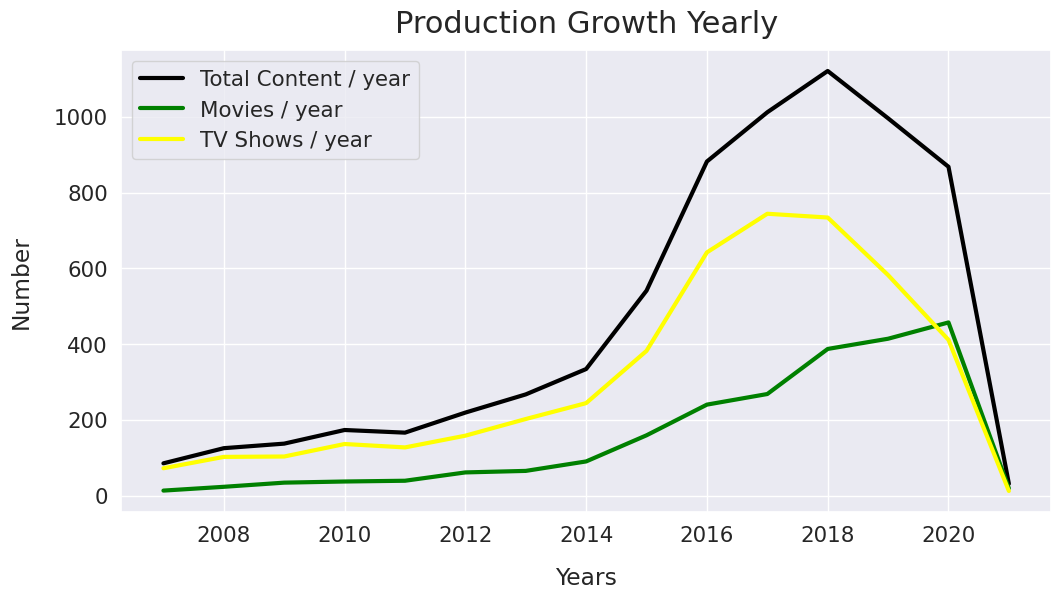

In [16]:
# Chart - 1 visualization code
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=3, color='black',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=3, color='green',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=3, color='yellow',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: >

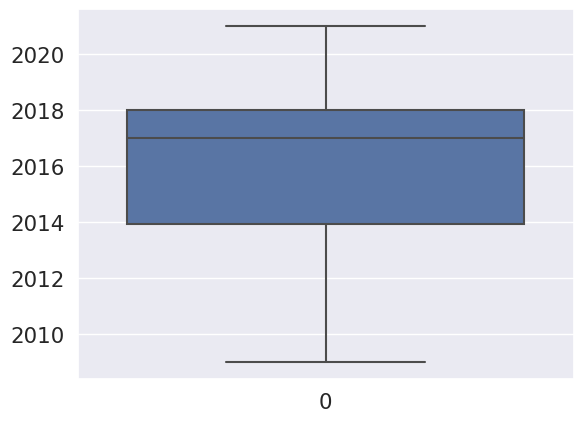

In [27]:
# Chart - 2 visualization code
sns.boxplot(df.release_year)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

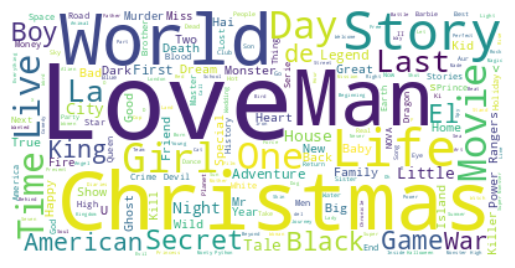

In [30]:
# Chart - 3 visualization code
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='country'>

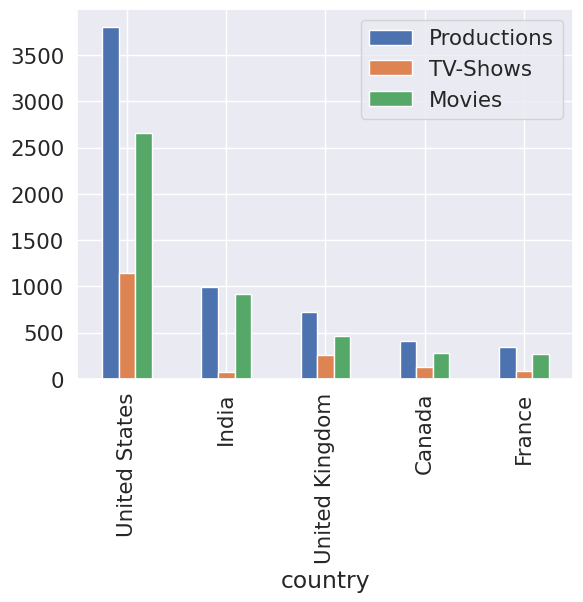

In [43]:
# Chart - 4 visualization code
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

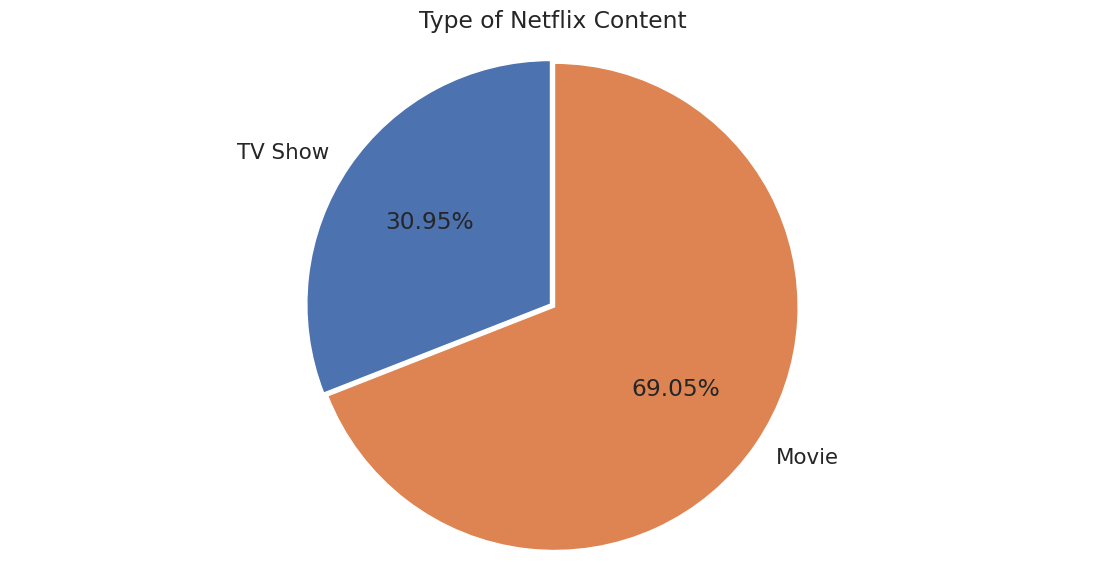

In [44]:
# Chart - 5 visualization code
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='duration', ylabel='Density'>

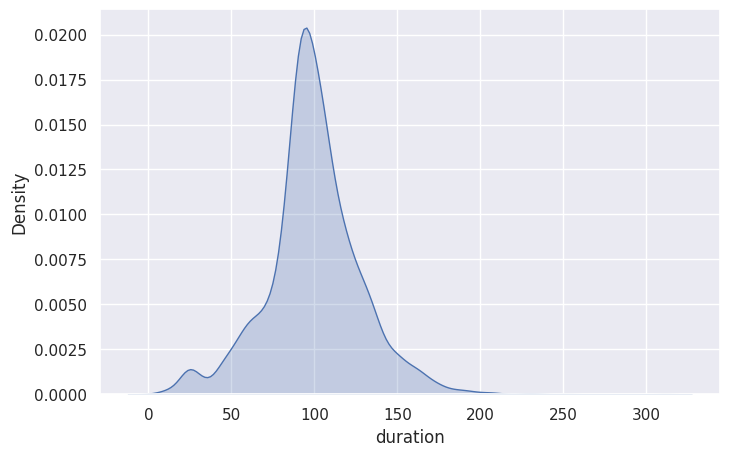

In [56]:
# Chart - 6 visualization code
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [57]:
# Chart - 7 visualization code
#Analysis on the duration of TV shows
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

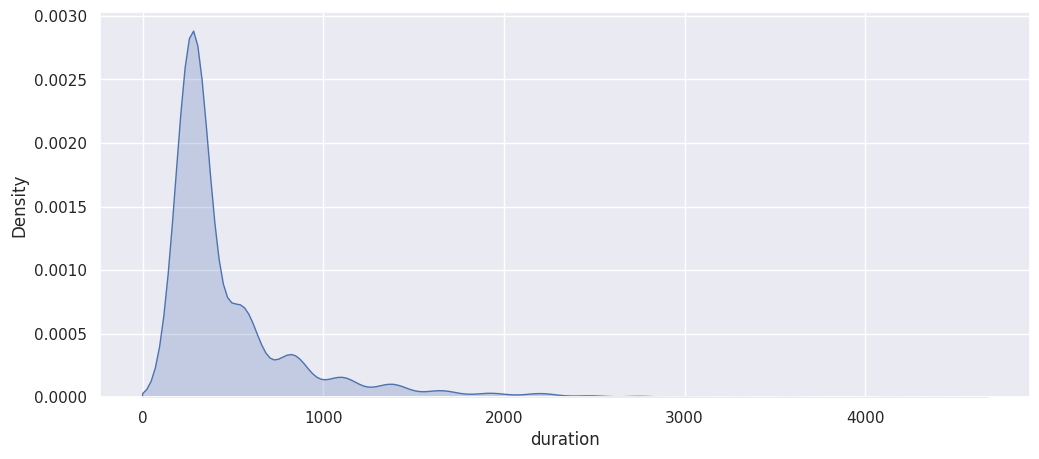

In [58]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Figure size 1600x800 with 0 Axes>

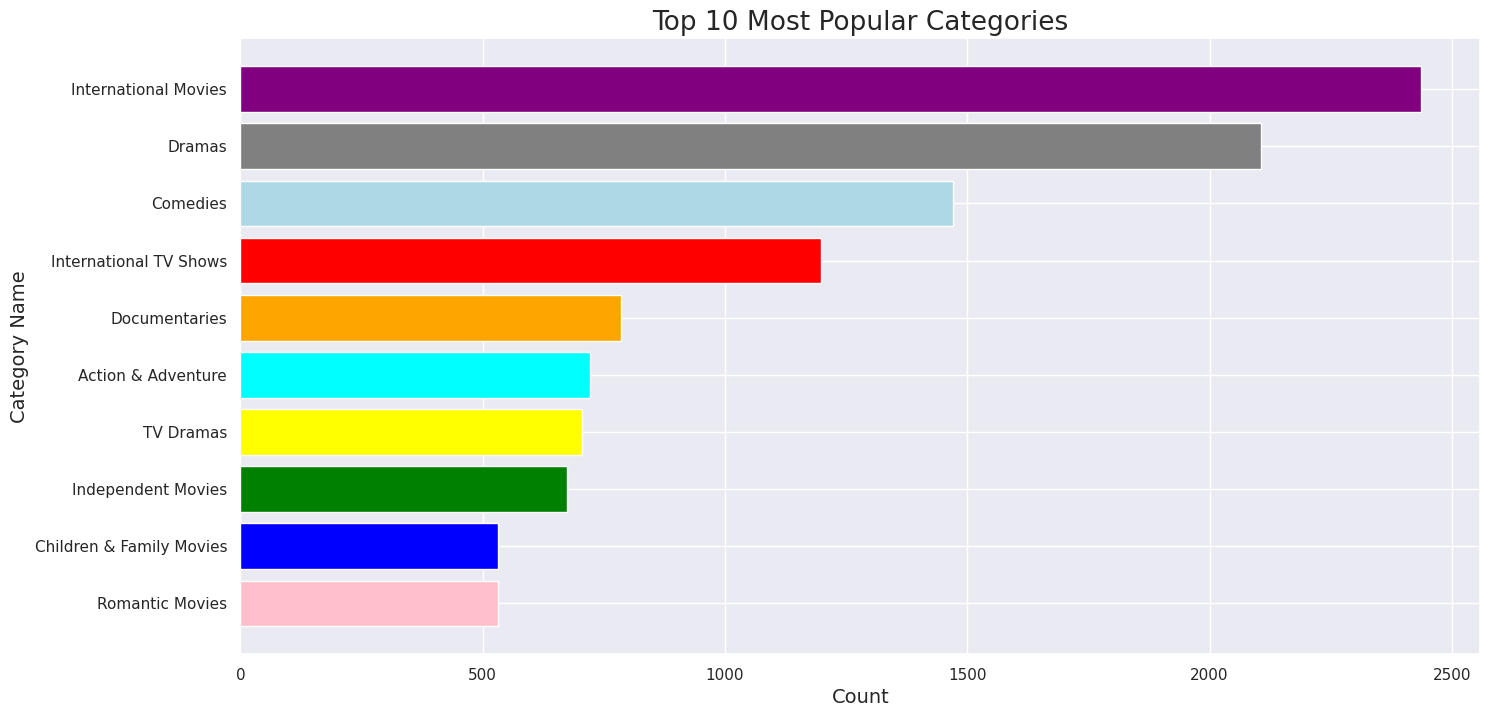

<Figure size 1600x800 with 0 Axes>

In [76]:
# Chart - 8 visualization code
plt.figure( figsize = (16,8))
color=['pink', 'blue', 'green', 'yellow', 'cyan' , "orange" ,'red', 'lightblue', 'grey', 'purple']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [84]:
# Chart - 9 visualization code
df.no_of_category.unique()

array([3, 2, 1])

In [85]:
df.no_of_category.value_counts()

3    3298
2    2688
1    1801
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

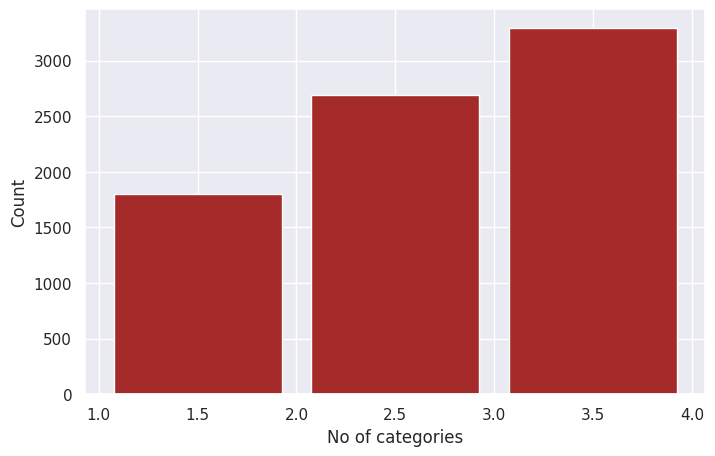

In [86]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='brown')
plt.xlabel("No of categories")
plt.ylabel("Count")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0, 0.5, 'Count')

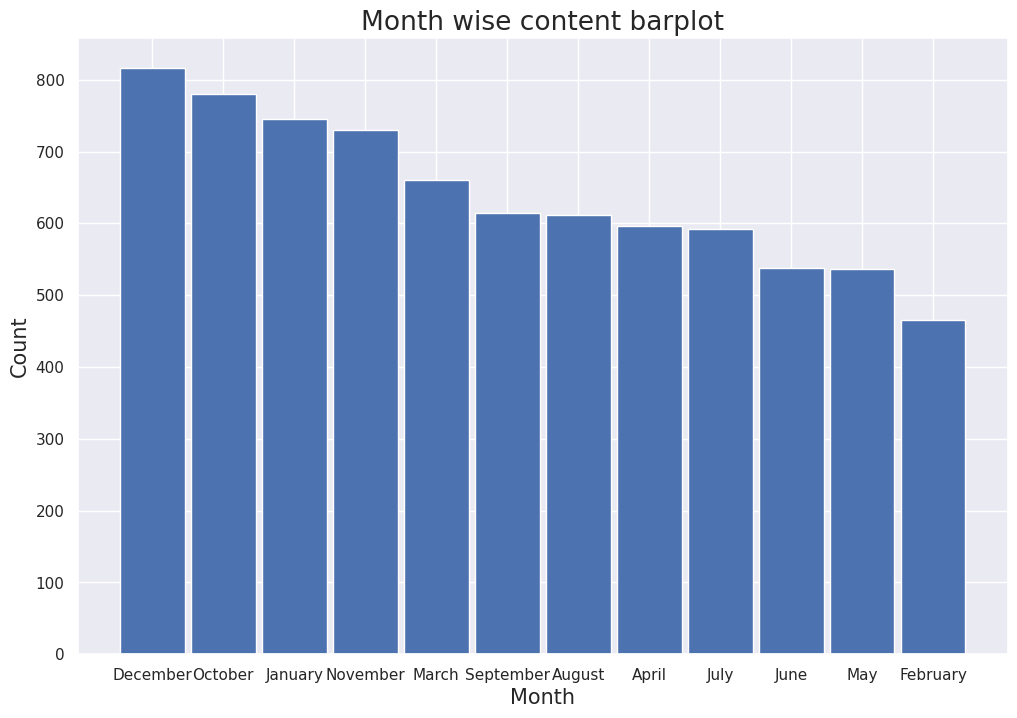

In [95]:
# Chart - 10 visualization code
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

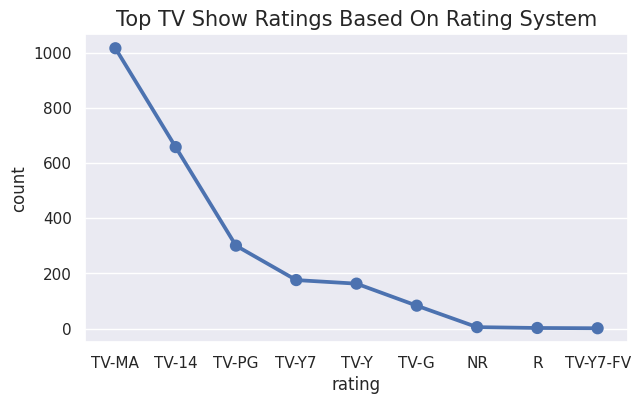

In [109]:
# Chart - 11 visualization code
#Pointplot on top tv show ratings
tv_ratings = df_tv_show.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [234]:
# Chart - 12 visualization code
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
show_id,,,,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


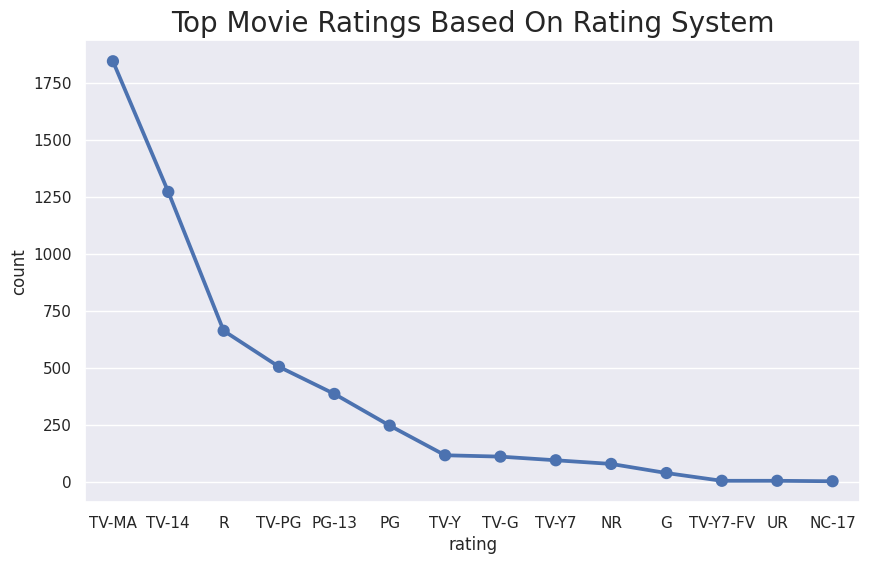

In [236]:
#Pointplot on top tv show ratings
tv_ratings = df_movies.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Let's consider the following hypothetical statements:

Statement 1: There is a significant difference in the average duration between movies and TV shows on Netflix.

Statement 2: There is a significant difference in the number of movies and TV shows released in different years.

Statement 3: The proportion of movies and TV shows with a high maturity rating (e.g., R, TV-MA) is higher than the proportion of movies and TV shows with a low maturity rating (e.g., PG, TV-G).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1:

Null hypothesis (H0): The average duration of movies and TV shows on Netflix is the same.
Alternative hypothesis (HA): The average duration of movies and TV shows on Netflix is different.

#### 2. Perform an appropriate statistical test.

In [239]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract the duration data for movies and TV shows into separate arrays
movie_duration = df[df['type'] == 'Movie']['duration'].values
tvshow_duration = df[df['type'] == 'TV Show']['duration'].values

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(movie_duration, tvshow_duration, equal_var=False)

# Print the obtained p-value
print("P-value: ", p_value)

P-value:  1.6320484767715316e-305


##### Which statistical test have you done to obtain P-Value?

To perform a statistical test to obtain the p-value for Statement 1, which compares the average duration of movies and TV shows on Netflix, you can use a two-sample t-test.

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two independent samples to determine if they are significantly different from each other. It is commonly employed when you have two groups or conditions and want to assess if there is a statistically significant difference between their means.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For Statement 2, the research hypothesis can be formulated as follows:

Null Hypothesis (H0): There is no significant difference in the number of movies and TV shows released in different years.

Alternative Hypothesis (HA): There is a significant difference in the number of movies and TV shows released in different years.

#### 2. Perform an appropriate statistical test.

In [252]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame 'df' containing the data
# with columns 'Year' and 'Type'

# Create a contingency table
contingency_table = pd.crosstab(df['release_year'], df['type'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p_value)

P-value: 1.3776852501299481e-86


##### Which statistical test have you done to obtain P-Value?

To obtain p value for statement 2 chi-square test of independence or Fisher's exact test. These tests can determine if there is a significant association between the variables 'release_year' and 'Type' (movies or TV shows).

##### Why did you choose the specific statistical test?

The reason we have used a chi-square test in this case is because we want to compare the observed distribution of movies and TV shows across different years with the expected distribution under the assumption of no association between the variables (movies/TV shows and years).

The chi-square test of independence is commonly used to assess if there is a significant association between two categorical variables. In our case, we want to determine if there is a significant difference in the distribution of movies and TV shows released in different years.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of high maturity rating media is equal to the proportion of low maturity rating media.

Alternative Hypothesis (H1): The proportion of high maturity rating media is higher than the proportion of low maturity rating media.

#### 2. Perform an appropriate statistical test.

In [263]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['rating'], columns='count')

# Calculate the observed frequencies
observed_frequencies = contingency_table['count'].values

# Create expected frequencies assuming equal proportions
expected_frequencies = [sum(observed_frequencies) / len(observed_frequencies)] * len(observed_frequencies)

# Perform the chi-square test
chi2, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the p-value
print("P-value:", p_value)


P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

To perform a statistical test and obtain the p-value for the hypothesis you mentioned, we can use a chi-square test of proportions. This test can determine whether the proportion of high maturity rating media is significantly different from the proportion of low maturity rating media.A p-value of 0.0 indicates that the observed data is extremely unlikely to occur under the assumption of the null hypothesis. However, it is important to note that p-values are typically reported with a limited number of decimal places, so a value of 0.0 is an approximation.

In hypothesis testing, a p-value less than the chosen significance level (usually denoted as α) indicates that there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. The significance level is predetermined and represents the threshold for rejecting the null hypothesis.

##### Why did you choose the specific statistical test?

The chi-square test of proportions is commonly used in situations where you want to compare the proportions of categorical variables between two or more groups. In your case, you are comparing the proportion of high maturity rating media to the proportion of low maturity rating media.

## ***6. Feature Engineering & Data Pre-processing***

In [264]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***